In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("customer_shopping_data.csv")

## Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 99457 dòng và 10 cột


## Có dữ liệu nào bị thiếu không?

In [4]:
data.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Không có cột nào bị thiếu dữ liệu

## Dữ liệu có trùng lặp không

In [5]:
data.duplicated().any()

False

Dữ liệu không có dòng nào trùng lặp

## Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Ta có thể thấy cột "invoice_date" đang có kiểu dữ liệu chưa phù hợp, vì thế ta sẽ chuyển nó thành kiểu datetime

In [7]:
data["invoice_date"] = pd.to_datetime(data["invoice_date"])

## Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

### Đối với cột dữ liệu dạng số bao gồm: age, quantity, price

In [8]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # missing_ratio
    data.append(round((100 - (len(temp) / len(array[col]) * 100)), 1))
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [9]:
num_col_info_df = pd.DataFrame(index = ['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data():
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,age,quantity,price
missing_ratio,0.0,0.0,0.00
min,18.0,1.0,5.23
lower_quartile,30.0,2.0,45.45
median,43.0,3.0,203.30
upper_quartile,56.0,4.0,1200.32
max,69.0,5.0,5250.00


Text(0.5, 0.98, 'Biểu đồ phân bố giá trị của các cột dạng số')

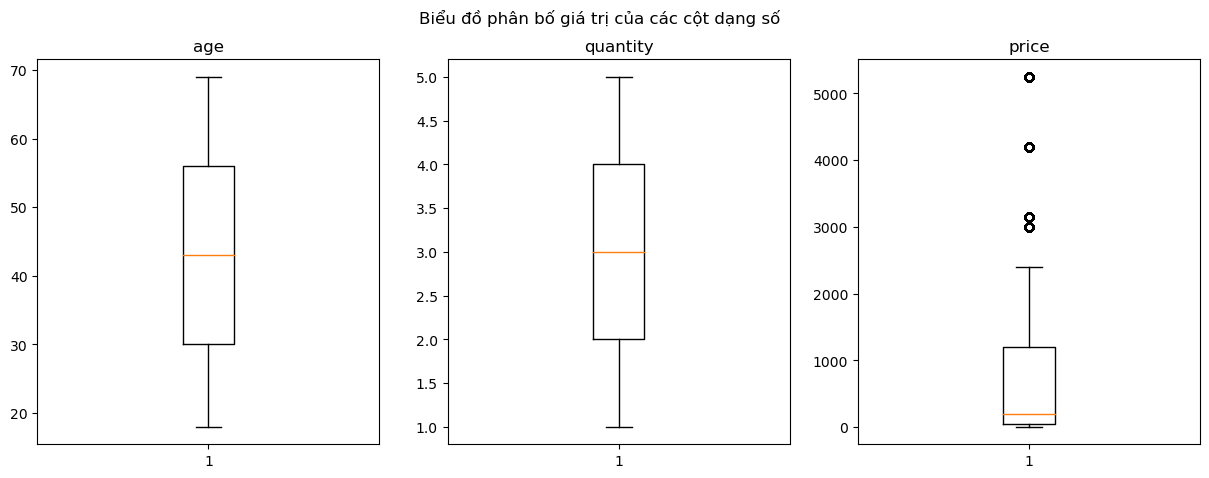

In [17]:
n = 1
fig = plt.figure(figsize=(15, 5))
for i in data._get_numeric_data():
    ax = plt.subplot(1, 3, n)
    ax.set_title(i)
    plt.boxplot(data[i])
    n += 1
fig.suptitle("Biểu đồ phân bố giá trị của các cột dạng số")

### Đối với các cột kiểu categorical

In [11]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # missing_ratio
    data.append(round((100 - (len(temp) / len(array[col]) * 100)), 1))
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [12]:
cat_col_info_df = pd.DataFrame(index = ['missing_ratio', 'num_values', 'value'])
for i in data.select_dtypes(include=['object']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,invoice_no,customer_id,gender,category,payment_method,shopping_mall
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,99457,99457,2,8,3,10
value,I100008 1 I100014 1 I100015 1 I100024...,C100004 1 C100005 1 C100006 1 C100012...,Female 59482 Male 39975 dtype: int64,Books 4981 Clothing 34...,Cash 44447 Credit Card 34931 Debi...,Cevahir AVM 4991 Emaar Square Mall ...
